-2.817816221300561
7.124423951466961
128
278
163
9.347179078253317
11.338335389549906
12.942604709566861
13.063990787578344
14.675181136479388
14.930211096777818
15.749759218064266


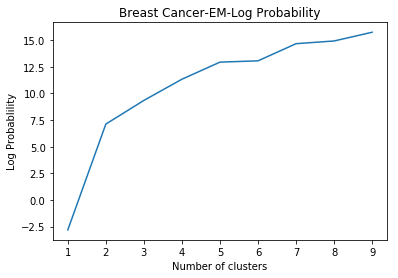

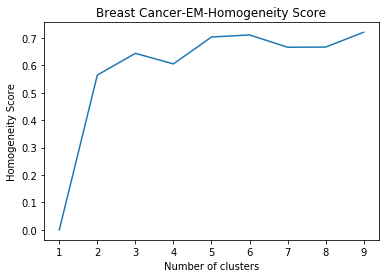

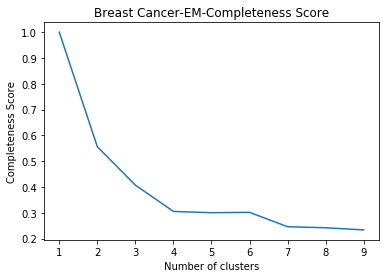

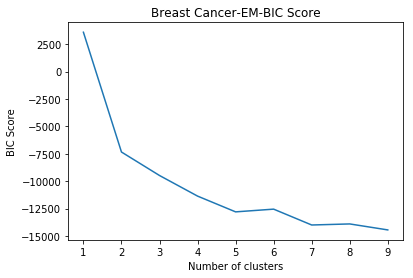

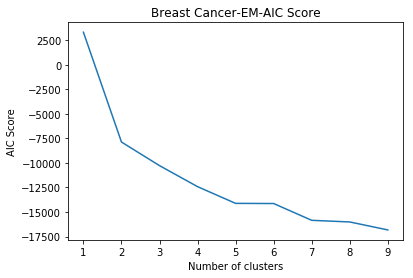

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics, decomposition
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.ticker import MaxNLocator
from sklearn import datasets

class ExpectationMaximizationTestCluster():
    def __init__(self, X, y, clusters, plot=False, targetcluster=3, stats=False):
        self.X = X
        self.y = y
        self.clusters = clusters
        self.gen_plot = plot
        self.targetcluster = targetcluster
        self.stats = stats

    def run(self):
        ll=[]
        homogeneity_scores=[]
        completeness_scores=[]
        rand_scores=[]
        silhouettes=[]
        bic=[]
        aic=[]
        model = GMM(covariance_type = 'diag')

        for k in self.clusters:
            model.set_params(n_components=k)
            model.fit(self.X)
            labels = model.predict(self.X)
            #print labels
            if k == self.targetcluster and self.stats:
                nd_data = np.concatenate((self.X, np.expand_dims(labels, axis=1),np.expand_dims(self.y, axis=1)), axis=1)
                pd_data = pd.DataFrame(nd_data)
                pd_data.to_csv("cluster_em.csv", index=False, index_label=False, header=False)

                for i in range (0,self.targetcluster):
                   
                    cluster = pd_data.loc[pd_data.iloc[:,-2]==i].iloc[:,-2:]
                    print(cluster.shape[0])
                    
            ll.append(model.score(self.X))
            print(model.score(self.X))
            homogeneity_scores.append(metrics.homogeneity_score(self.y, labels))
            completeness_scores.append(metrics.completeness_score(self.y, labels))
            rand_scores.append(metrics.adjusted_rand_score(self.y, labels))
            bic.append(model.bic(self.X))
            aic.append(model.aic(self.X))
            

        if self.gen_plot:
            self.plot(ll, homogeneity_scores, completeness_scores, rand_scores, bic, aic)


    def plot(self, ll, homogeneity, completeness, rand, bic, aic):
            """
            Plot average distance from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
             """
            

            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, ll)
            plt.xlabel('Number of clusters')
            plt.ylabel('Log Probablility')
            plt.title('Breast Cancer-EM-Log Probability')
            plt.show()

            """
            Plot homogeneity from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, homogeneity)
            plt.xlabel('Number of clusters')
            plt.ylabel('Homogeneity Score')
            plt.title('Breast Cancer-EM-Homogeneity Score')
            plt.show()

            """
            Plot completeness from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, completeness)
            plt.xlabel('Number of clusters')
            plt.ylabel('Completeness Score')
            plt.title('Breast Cancer-EM-Completeness Score')
            plt.show()

            """
            Plot BIC Score from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, bic)
            plt.xlabel('Number of clusters')
            plt.ylabel('BIC Score')
            plt.title('Breast Cancer-EM-BIC Score')
            plt.show()

            """
            Plot AIC Score from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, aic)
            plt.xlabel('Number of clusters')
            plt.ylabel('AIC Score')
            plt.title('Breast Cancer-EM-AIC Score')
            plt.show()




breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
tester = ExpectationMaximizationTestCluster(X, y, clusters=range(1,10), plot=True, targetcluster=3, stats=True)
tester.run()